In [20]:
from sklearn.cluster import DBSCAN, KMeans
import numpy as np
from collections import defaultdict
from network import Network
import matplotlib.pyplot as plt


def create_cluster_nodes(network: Network, n_clusters: int = 2):
    """
    Clusters nodes in the given network using DBSCAN.
    
    Args:
        network (Network): The network to be clustered.
        eps (float): The maximum distance between two samples for them to be considered in the same neighborhood.
        min_samples (int): The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

    Returns:
        dict[int, list[Node]]: A dictionary mapping cluster IDs to lists of nodes in that cluster.
    """
    # Extract positions as a 2D array for clustering
    positions = np.array([[node.pos.x, node.pos.y] for node in network.nodes])

    # Run DBSCAN clustering
    kmeans = KMeans(n_clusters = n_clusters)
    clustering = kmeans.fit(positions)

    # Create a dictionary mapping clusters to nodes
    cluster_map = defaultdict(list)
    for node, cluster_label in zip(network.nodes, clustering.labels_):
        cluster_map[cluster_label].append(node)

    y = [node.pos.x for node in network.nodes]
    x = [node.pos.y for node in network.nodes]
    plt.scatter(x, y, c = kmeans.labels_)
    plt.show()

    # Remove the noise cluster (label == -1) if present
    if -1 in cluster_map:
        del cluster_map[-1]

    return cluster_map, kmeans.inertia_

In [4]:
from simulator import Simulator
from network import Network
import numpy as np

from network import servers_csv_to_dict, pings_csv_to_dict

network = Network.from_dicts(pings_csv_to_dict("./../pings.csv"), servers_csv_to_dict("./../servers.csv"), fraction = 1)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


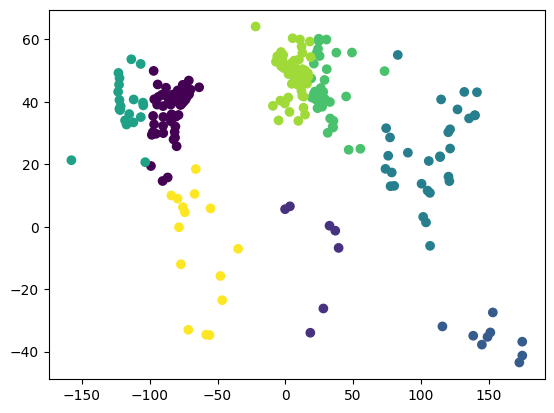

Cluster 7: [0, 49, 50, 70, 74, 99, 108, 125, 167, 168, 213, 238, 242, 254, 262]
Cluster 2: [1, 8, 21, 59, 105, 107, 139, 169, 218]
Cluster 0: [2, 12, 13, 14, 15, 16, 18, 22, 33, 39, 40, 51, 52, 55, 68, 75, 78, 80, 81, 83, 89, 90, 92, 96, 97, 98, 101, 102, 106, 109, 110, 114, 121, 122, 124, 130, 135, 136, 137, 138, 140, 141, 143, 144, 145, 162, 171, 181, 184, 220, 230, 231, 233, 235, 239, 249, 250, 256, 259]
Cluster 6: [3, 4, 7, 10, 11, 17, 19, 20, 26, 27, 28, 29, 35, 43, 44, 48, 54, 58, 60, 61, 63, 76, 77, 88, 91, 94, 129, 147, 150, 153, 156, 157, 158, 161, 164, 185, 187, 188, 189, 190, 191, 195, 196, 197, 198, 200, 202, 203, 204, 206, 208, 210, 211, 212, 215, 216, 217, 223, 226, 228, 229, 234, 236, 240, 241, 246, 247, 248, 260, 263, 264, 291]
Cluster 3: [6, 31, 36, 46, 56, 57, 64, 65, 72, 84, 85, 95, 111, 112, 113, 119, 148, 155, 159, 165, 176, 180, 186, 209, 221, 222, 224, 232, 244, 261]
Cluster 5: [9, 25, 32, 34, 45, 47, 62, 66, 67, 69, 87, 104, 116, 117, 126, 127, 133, 149, 154, 16

In [38]:

# Cluster nodes
clusters, ineratia_v = create_cluster_nodes(network, n_clusters=8)

# Print cluster assignments
for cluster_id, cluster_nodes in clusters.items():
    print(f"Cluster {cluster_id}: {[node.node_id for node in cluster_nodes]}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


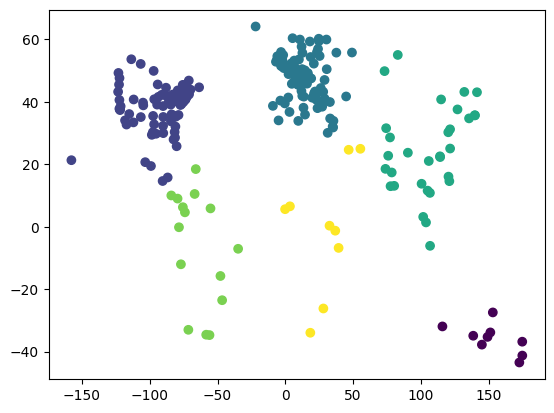

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


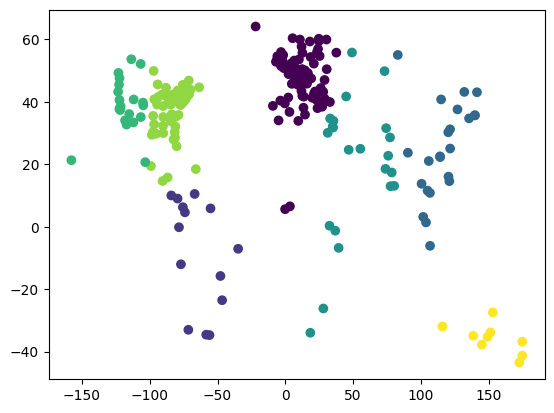

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


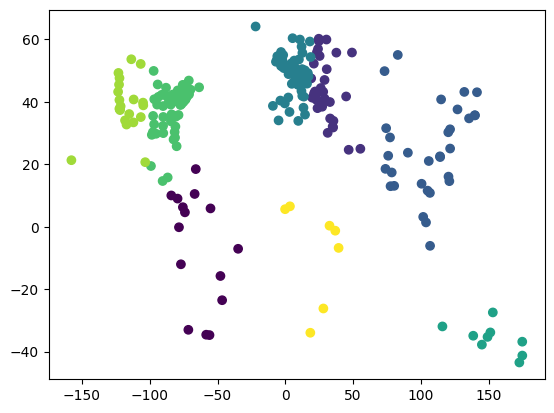

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


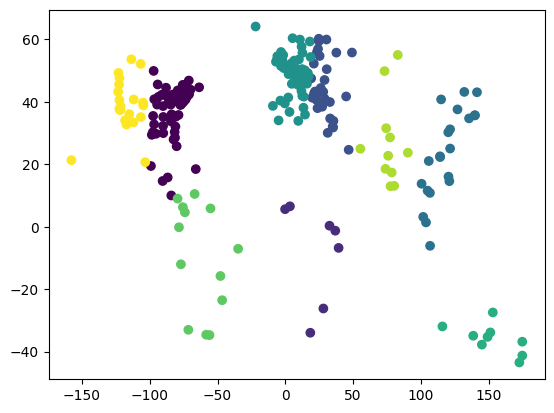

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


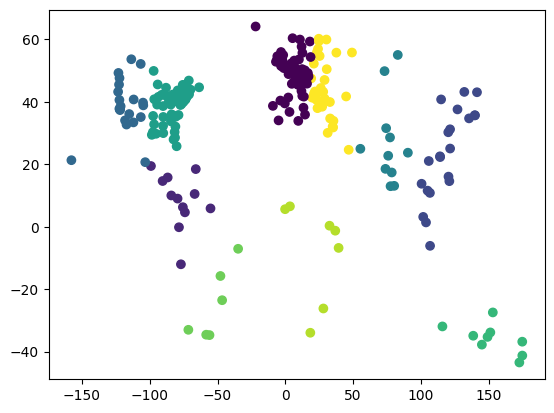

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


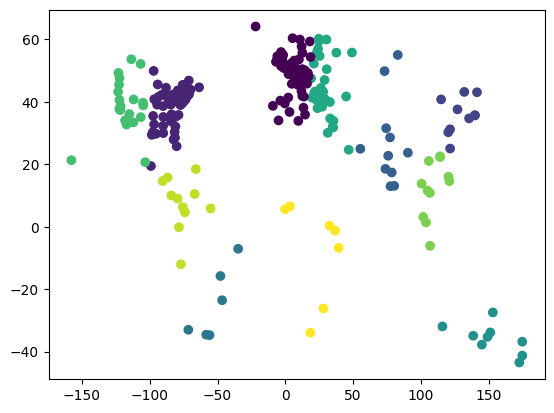

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


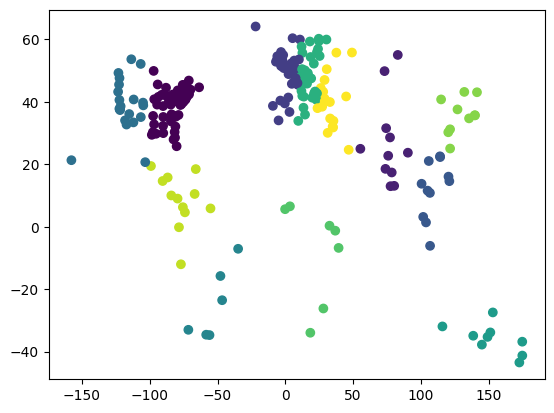

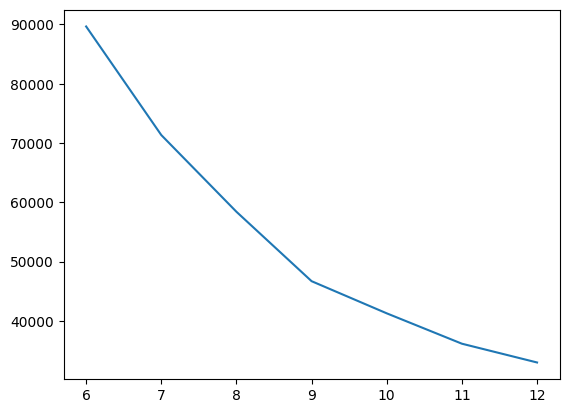

In [40]:
num_clusters_list = [6, 7, 8, 9, 10, 11, 12]
inertias = []
for num_clusters in num_clusters_list:

    # Cluster nodes
    clusters, ineratia_v = create_cluster_nodes(network, n_clusters=num_clusters)
    inertias.append(ineratia_v)

plt.plot(num_clusters_list, inertias)
plt.show()